In [2]:
import matplotlib.pyplot as plt
import networkx as nx

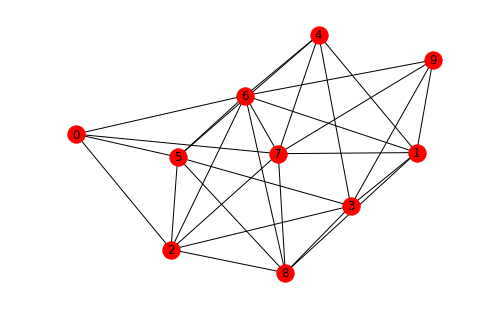

In [3]:
n = 10
p = 0.7
G = nx.gnp_random_graph(n, p)
nx.draw(G, with_labels = True)
plt.show()

In [4]:
# Miary sieciowe

# stopień
print(nx.degree(G))
# bliskość
print(nx.closeness_centrality(G))
# pośrednictwo
print(nx.betweenness_centrality(G))
# pagerank
print(nx.pagerank(G))

[(0, 4), (1, 6), (2, 6), (3, 6), (4, 5), (5, 6), (6, 8), (7, 7), (8, 6), (9, 4)]
{0: 0.6428571428571429, 1: 0.75, 2: 0.75, 3: 0.75, 4: 0.6923076923076923, 5: 0.75, 6: 0.9, 7: 0.8181818181818182, 8: 0.75, 9: 0.6428571428571429}
{0: 0.005555555555555556, 1: 0.029629629629629627, 2: 0.03657407407407407, 3: 0.06342592592592591, 4: 0.022685185185185183, 5: 0.04722222222222222, 6: 0.11296296296296295, 7: 0.08657407407407405, 8: 0.029629629629629627, 9: 0.010185185185185186}
{0: 0.07277406544422516, 1: 0.1030790169910224, 2: 0.1028089762607666, 3: 0.10360491671470692, 4: 0.08748995344071275, 5: 0.1032188188826829, 6: 0.13347429652657536, 7: 0.1186282707198442, 8: 0.10205448712135921, 9: 0.07286719789810435}


In [5]:
# Globalne miary sieciowe

# średnia z najkrótszych ścieżek
print(nx.average_shortest_path_length(G))
# średnica
print(nx.diameter(G))
# centralizacja stopni
print(nx.degree_centrality(G))
# gęstość
print(nx.density(G))


1.3555555555555556
2
{0: 0.4444444444444444, 1: 0.6666666666666666, 2: 0.6666666666666666, 3: 0.6666666666666666, 4: 0.5555555555555556, 5: 0.6666666666666666, 6: 0.8888888888888888, 7: 0.7777777777777777, 8: 0.6666666666666666, 9: 0.4444444444444444}
0.6444444444444445


In [87]:
from collections import OrderedDict

def compare(graph1, graph2):
    result = OrderedDict()
    # rozklady miar
    graph1_degree_centrality = list(nx.degree_centrality(graph1).values())
    graph2_degree_centrality = list(nx.degree_centrality(graph2).values())
    result['degree_centrality'] = stats.ks_2samp(graph1_degree_centrality, graph2_degree_centrality)
    
    graph1_closeness_centrality = list(nx.closeness_centrality(graph1).values())
    graph2_closeness_centrality = list(nx.closeness_centrality(graph2).values())
    result['closeness_centrality'] = stats.ks_2samp(graph1_closeness_centrality, graph2_closeness_centrality)
    
    graph1_betweenness_centrality = list(nx.betweenness_centrality(graph1).values())
    graph2_betweenness_centrality = list(nx.betweenness_centrality(graph2).values())
    result['betweenness_centrality'] = stats.ks_2samp(graph1_betweenness_centrality, graph2_betweenness_centrality)
    
    graph1_pagerank = list(nx.pagerank(graph1).values())
    graph2_pagerank = list(nx.pagerank(graph2).values())
    result['pagerank'] = stats.ks_2samp(graph1_pagerank, graph2_pagerank)
    
    # bezwzgledne roznice globalnych miar
    result['average_shortest_path_length'] = abs(nx.average_shortest_path_length(graph1) - nx.average_shortest_path_length(graph2))
    result['diameter'] = abs(nx.diameter(graph1) - nx.diameter(graph2))
    result['degree_centrailty'] = '?'
    result['density'] = abs(nx.density(graph1) - nx.density(graph2))
    
    return result

In [88]:
n1, p1 = 10, 0.8
n2, p2 = 15, 0.7

graph1 = nx.gnp_random_graph(n1, p1)
graph2 = nx.gnp_random_graph(n2, p2)

compare(graph1, graph2)

OrderedDict([('degree_centrality',
              Ks_2sampResult(statistic=0.29999999999999993, pvalue=0.56985328946142477)),
             ('closeness_centrality',
              Ks_2sampResult(statistic=0.29999999999999993, pvalue=0.56985328946142477)),
             ('betweenness_centrality',
              Ks_2sampResult(statistic=0.6333333333333333, pvalue=0.0083116302682622687)),
             ('pagerank',
              Ks_2sampResult(statistic=0.93333333333333335, pvalue=1.3469710253251675e-05)),
             ('average_shortest_path_length', 0.006349206349206327),
             ('diameter', 0),
             ('degree_centrailty', '?'),
             ('density', 0.006349206349206327)])

In [53]:
import numpy as np
from scipy import stats

np.random.seed(93)
n1 = 200
n2 = 300

rvs1 = stats.norm.rvs(size=n1, loc=0., scale=1)
rvs2 = stats.norm.rvs(size=n2, loc=0., scale=1)
stats.ks_2samp(rvs1, rvs2).pvalue
# statistic small or pvalue high

0.85125681512988727

In [80]:
v1 = list(nx.pagerank(graph1).values())
v2 = list(nx.pagerank(graph2).values())

stats.ks_2samp(v1, v2)


Ks_2sampResult(statistic=1.0, pvalue=2.3129269928550027e-06)